<a href="https://colab.research.google.com/github/Ad2891/Slutuppgift-team12/blob/main/Slutuppgift.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Slutuppgift 1 - Identifying Employee Attrition 

## The Problem Question

During this task, it is our goal to identify features of interest that can be used to predict the reasons for employee attrition. So the question used for this problem is:

>**How can prior indicators from features be used to predict if an employee is at risk of leaving the company?**
>
>**How a prediction can be used to understand the risk of employee attrition?**



In [54]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn

from pandas import Series, DataFrame
from pylab import rcParams
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.metrics import classification_report

First we retrieve the data.

In [55]:
#Import .csv file and save in variable employee_data 
employee_data = pd.read_csv("/content/WA_Fn-UseC_-HR-Employee-Attrition.csv", sep=",")
employee_data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


## Converting string text into dummy variables

In order to see correlation between the features, we have to be able to compare the values. As many of the features contain text as a value, it difficult to do this comparison. To combat this, we use dummy variable in there place. As all the features that contain text use a predefine value, we are able to use dummy in their place as we know what values are found in each feature.

### Dummy for features with only two options

We are able to use an already existing function to convert the values of features "Gender", "Attrition", "OverTime" and "Over18" as these only contain values "Male" and "Female" for the "Gender" feature, and "Yes" and "No" for the others.

Something to note is that this will change the name of the columns to that of the old name and the first value in the column (ex. "Attrition" --> "Attrition_Yes"). We change that at the end of this section.

In [56]:
#Create dummy feature for the feature "Attrition" and then drop it
employee_data_attrition_dummy = pd.get_dummies(employee_data, columns=['Attrition'],
                                               drop_first=True)

In [57]:
#Create dummy feature for the feature "Gender" and then drop it
employee_data_attrition_gender_dummy = pd.get_dummies(employee_data_attrition_dummy,
                                                      columns=['Gender'], drop_first=True) 

In [58]:
#Create dummy feature for the feature "Over18" and then drop it
employee_data_attrition_gender_over_dummy = pd.get_dummies(employee_data_attrition_gender_dummy, 
                         columns=['Over18'], drop_first=True)

Something to note is that the feature 'Over18' only contains one value ('Y') so the column will be dropped with no dummy feature taking its place. This isn't a problem as the feature would not have influenced our result.

In [59]:
#Create dummy feature for the feature "OverTime" and then drop it
employee_data_attrition_gender_over_time_dummy = pd.get_dummies(employee_data_attrition_gender_over_dummy, 
                         columns=['OverTime'], drop_first=True)

All that is left is to rename the new columns to their prior names.

In [60]:
#Rename the columns
employee_data_attrition_gender_over_time_dummy.rename(columns={'Attrition_Yes': 'Attrition',
                                                               'Gender_Male': 'Gender',
                                                               'OverTime_Yes': 'OverTime'},
                                                      inplace = True)

This is a tool tip for understanding the values:

>"Attrition": 1 = Yes, 0 = No
>
>"Gender": 1 = Male, 0 = Female
>
>"OverTime_Yes": 1 = Yes, 0 = No

### Dummy for features with more then two options

As some features have more then two unique values in them, we cannot use the previous method. Instead, we will have change them manually. Each of the changes will occur in a new dataframe.

Tool tip for understanding the values:

>"BusinessTravel": 3 = Travel_Rarely, 2 = Travel_Frequently, 1 = Non-Travel
>
>"Department": 3 = Sale, 2 = Research & Development, 1 = Human Resources
>
>"EducationField": 6 = Technical Degree, 5 = Other, 4 = Medical, 3 = Marketing, 2 = Life Sciences, 1 = Human Resources
>
>"JobRole": 9 = Sales Representative, 8 = Sales Executive, 7 = Research Scientist, 6 = Research Director, 5 = Manufacturing Director, 4 = Manager, 3 = Laboratory Technician, 2 = Human Resources, 1 = Healthcare Representative
>
>"MaritalStatus": 3 = Single, 2 = Married, 1 = Divorced 

In [61]:
#Create a new dataframe from the previous dataframe 
employee_data_attrition_gender_over_time_business_dummy = employee_data_attrition_gender_over_time_dummy
#Create the dummy values from the available values
employee_data_attrition_gender_over_time_business_dummy.loc[
                employee_data_attrition_gender_over_time_business_dummy['BusinessTravel'] 
                == 'Travel_Rarely', 'BusinessTravel'] = 3
employee_data_attrition_gender_over_time_business_dummy.loc[
                employee_data_attrition_gender_over_time_business_dummy['BusinessTravel'] 
                == 'Travel_Frequently', 'BusinessTravel'] = 2
employee_data_attrition_gender_over_time_business_dummy.loc[
                employee_data_attrition_gender_over_time_business_dummy['BusinessTravel'] 
                == 'Non-Travel', 'BusinessTravel'] = 1

In [62]:
#Create a new dataframe from the previous dataframe 
employee_data_attrition_gender_over_time_business_dep_dummy = employee_data_attrition_gender_over_time_business_dummy
#Create the dummy values from the available values
employee_data_attrition_gender_over_time_business_dep_dummy.loc[
                employee_data_attrition_gender_over_time_business_dep_dummy['Department'] 
                == 'Sales', 'Department'] = 3
employee_data_attrition_gender_over_time_business_dep_dummy.loc[
                employee_data_attrition_gender_over_time_business_dep_dummy['Department'] 
                == 'Research & Development', 'Department'] = 2
employee_data_attrition_gender_over_time_business_dep_dummy.loc[
                employee_data_attrition_gender_over_time_business_dep_dummy['Department'] 
                == 'Human Resources', 'Department'] = 1

In [63]:
#Create a new dataframe from the previous dataframe 
employee_data_attrition_gender_over_time_business_dep_educ_dummy = employee_data_attrition_gender_over_time_business_dep_dummy
#Create the dummy values from the available values
employee_data_attrition_gender_over_time_business_dep_educ_dummy.loc[
                employee_data_attrition_gender_over_time_business_dep_educ_dummy['EducationField'] 
                == 'Technical Degree', 'EducationField'] = 6
employee_data_attrition_gender_over_time_business_dep_educ_dummy.loc[
                employee_data_attrition_gender_over_time_business_dep_educ_dummy['EducationField'] 
                == 'Other', 'EducationField'] = 5
employee_data_attrition_gender_over_time_business_dep_educ_dummy.loc[
                employee_data_attrition_gender_over_time_business_dep_educ_dummy['EducationField'] 
                == 'Medical', 'EducationField'] = 4
employee_data_attrition_gender_over_time_business_dep_educ_dummy.loc[
                employee_data_attrition_gender_over_time_business_dep_educ_dummy['EducationField'] 
                == 'Marketing', 'EducationField'] = 3
employee_data_attrition_gender_over_time_business_dep_educ_dummy.loc[
                employee_data_attrition_gender_over_time_business_dep_educ_dummy['EducationField'] 
                == 'Life Sciences', 'EducationField'] = 2
employee_data_attrition_gender_over_time_business_dep_educ_dummy.loc[
                employee_data_attrition_gender_over_time_business_dep_educ_dummy['EducationField'] 
                == 'Human Resources', 'EducationField'] = 1

In [64]:
#Create a new dataframe from the previous dataframe 
employee_data_attrition_gender_over_time_business_dep_educ_job_dummy = employee_data_attrition_gender_over_time_business_dep_educ_dummy
#Create the dummy values from the available values
employee_data_attrition_gender_over_time_business_dep_educ_job_dummy.loc[
                employee_data_attrition_gender_over_time_business_dep_educ_job_dummy['JobRole'] 
                == 'Sales Representative', 'JobRole'] = 9
employee_data_attrition_gender_over_time_business_dep_educ_job_dummy.loc[
                employee_data_attrition_gender_over_time_business_dep_educ_job_dummy['JobRole'] 
                == 'Sales Executive', 'JobRole'] = 8
employee_data_attrition_gender_over_time_business_dep_educ_job_dummy.loc[
                employee_data_attrition_gender_over_time_business_dep_educ_job_dummy['JobRole'] 
                == 'Research Scientist', 'JobRole'] = 7
employee_data_attrition_gender_over_time_business_dep_educ_job_dummy.loc[
                employee_data_attrition_gender_over_time_business_dep_educ_job_dummy['JobRole'] 
                == 'Research Director', 'JobRole'] = 6
employee_data_attrition_gender_over_time_business_dep_educ_job_dummy.loc[
                employee_data_attrition_gender_over_time_business_dep_educ_job_dummy['JobRole'] 
                == 'Manufacturing Director', 'JobRole'] = 5
employee_data_attrition_gender_over_time_business_dep_educ_job_dummy.loc[
                employee_data_attrition_gender_over_time_business_dep_educ_job_dummy['JobRole'] 
                == 'Manager', 'JobRole'] = 4
employee_data_attrition_gender_over_time_business_dep_educ_job_dummy.loc[
                employee_data_attrition_gender_over_time_business_dep_educ_job_dummy['JobRole'] 
                == 'Laboratory Technician', 'JobRole'] = 3
employee_data_attrition_gender_over_time_business_dep_educ_job_dummy.loc[
                employee_data_attrition_gender_over_time_business_dep_educ_job_dummy['JobRole'] 
                == 'Human Resources', 'JobRole'] = 2
employee_data_attrition_gender_over_time_business_dep_educ_job_dummy.loc[
                employee_data_attrition_gender_over_time_business_dep_educ_job_dummy['JobRole'] 
                == 'Healthcare Representative', 'JobRole'] = 1

In [65]:
#Create a new dataframe from the previous dataframe 
employee_data_attrition_gender_over_time_business_dep_educ_job_rel_dummy = employee_data_attrition_gender_over_time_business_dep_educ_job_dummy
#Create the dummy values from the available values
employee_data_attrition_gender_over_time_business_dep_educ_job_rel_dummy.loc[
                employee_data_attrition_gender_over_time_business_dep_educ_job_rel_dummy['MaritalStatus'] 
                == 'Single', 'MaritalStatus'] = 3
employee_data_attrition_gender_over_time_business_dep_educ_job_rel_dummy.loc[
                employee_data_attrition_gender_over_time_business_dep_educ_job_rel_dummy['MaritalStatus'] 
                == 'Married', 'MaritalStatus'] = 2
employee_data_attrition_gender_over_time_business_dep_educ_job_rel_dummy.loc[
                employee_data_attrition_gender_over_time_business_dep_educ_job_rel_dummy['MaritalStatus'] 
                == 'Divorced', 'MaritalStatus'] = 1

In [66]:
#rename the last dataframe
employee_data_dummies = employee_data_attrition_gender_over_time_business_dep_educ_job_rel_dummy

These changes have not changed the dtype of the features so we will have to change it manually. Not doing this would mean a correlation could not be established.

In [67]:
#change the dtype of the features below to int
employee_data_dummies = employee_data_dummies.astype({'Department' : int})
employee_data_dummies = employee_data_dummies.astype({'BusinessTravel' : int})
employee_data_dummies = employee_data_dummies.astype({'EducationField' : int})
employee_data_dummies = employee_data_dummies.astype({'JobRole' : int})
employee_data_dummies = employee_data_dummies.astype({'MaritalStatus' : int})

## Removing unnecessary features

As many of the features in the dataframe are linked others, it will require us to remove a number of them to reduce the redundance and avoid using the same variables twice in our prediction model. We have already removed 'Over18' as it only contained one unique variable. 'StandardHours' and 'EmployeeCount' have the same issue with only one unique value.

We can also use the function ".corr()" to see the correlation between features. Features that have a low value (<0.25) with any other feature **and** are not reflected in other features, will removed as we are not able to use them for our analysis.

In [68]:
#Display all features
pd.set_option('display.max_columns', None)
#Calculate the correlation of the dataframe
employee_data_dummies.corr()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,Gender,OverTime
Age,1.000000,0.024751,0.010661,-0.031882,-0.001686,0.208034,-0.040873,NaN,-0.010145,0.010146,0.024287,0.029820,0.509604,-0.122427,-0.004892,-0.095029,0.497855,0.028051,0.299635,0.003634,0.001904,0.053535,NaN,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089,-0.159205,-0.036311,0.028062
BusinessTravel,0.024751,1.000000,-0.004086,-0.009044,-0.024469,0.000757,0.023724,NaN,-0.015578,0.004174,0.026528,0.039062,0.019311,0.002724,-0.033962,0.024001,0.034319,-0.014107,0.020875,-0.029377,-0.026341,-0.035986,NaN,-0.016727,0.034226,0.015240,-0.011256,-0.014575,-0.011497,-0.032591,-0.022636,0.000074,-0.032981,0.016543
DailyRate,0.010661,-0.004086,1.000000,0.007109,-0.004985,-0.016806,0.037709,NaN,-0.050990,0.018355,0.023381,0.046135,0.002966,-0.009472,0.030571,-0.069586,0.007707,-0.032182,0.038153,0.022704,0.000473,0.007846,NaN,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363,-0.056652,-0.011716,0.009135
Department,-0.031882,-0.009044,0.007109,1.000000,0.017225,0.007996,0.013720,NaN,-0.010895,-0.019395,-0.004144,-0.024586,0.101963,0.662431,0.021001,0.056073,0.053130,0.023642,-0.035882,-0.007840,-0.024604,-0.022414,NaN,-0.012193,-0.015762,0.036875,0.026383,0.022920,0.056315,0.040061,0.034282,0.063991,-0.041583,0.007481
DistanceFromHome,-0.001686,-0.024469,-0.004985,0.017225,1.000000,0.021042,0.002013,NaN,0.032916,-0.016075,0.031131,0.008783,0.005303,-0.001015,-0.003669,-0.014437,-0.017014,0.027473,-0.029251,0.040235,0.027110,0.006557,NaN,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406,0.077924,-0.001851,0.025514
Education,0.208034,0.000757,-0.016806,0.007996,0.021042,1.000000,-0.039592,NaN,0.042070,-0.027128,0.016775,0.042438,0.101589,0.004236,-0.011296,0.004053,0.094961,-0.026084,0.126317,-0.011111,-0.024539,-0.009118,NaN,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065,-0.031373,-0.016547,-0.020322
EducationField,-0.040873,0.023724,0.037709,0.013720,0.002013,-0.039592,1.000000,NaN,-0.002516,0.043163,-0.021941,-0.002655,-0.044933,0.015599,-0.034401,0.014420,-0.041070,-0.027182,-0.008663,-0.011214,-0.005614,-0.004378,NaN,-0.016185,-0.027848,0.049195,0.041191,-0.018692,-0.010506,0.002326,-0.004130,0.026846,-0.002504,0.002259
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,-0.010145,-0.015578,-0.050990,-0.010895,0.032916,0.042070,-0.002516,NaN,1.000000,0.017621,0.035179,-0.006888,-0.018519,-0.010336,-0.046247,-0.008155,-0.014829,0.012648,-0.001251,-0.012944,-0.020359,-0.069861,NaN,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197,-0.010577,0.022556,-0.024037
EnvironmentSatisfaction,0.010146,0.004174,0.018355,-0.019395,-0.016075,-0.027128,0.043163,NaN,0.017621,1.000000,-0.049857,-0.008278,0.001212,-0.017321,-0.006784,-0.003593,-0.006259,0.037600,0.012594,-0.031701,-0.029548,0.007665,NaN,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999,-0.103369,0.000508,0.070132


After analysing the results, we have determined that the following features will be removed:

*   DailyRate: Low values, available in other features.
*   EmployeeNumber: A special case, has nothing to do with the employee and is only used for administrative issues.
*   HourlyRate: Available in other features.
*   MonthlyRate: Available in other features, better to use MonthlyIncome.
*   JobLevel: Does not contain a lot of information and is not connected another valuable feature.
*   MaritalStatus: More to do with outside life, can't really be connected to any other features.
*   PerformanceRating: Has a strong correlation between PercentSalaryHike.
*   RelationshipSatisfaction: To do with outside life, can't really be connected to other features.
*   NumCompaniesWorked: Has correlation to working years and not really useful for understanding why people leave.
*   TrainingTimesLastYear: Has no correlation to other features and not relevant to Attrition.
*   TotalWorkingYears: Not relevant as we have age (better indicator for retirment) and years at company.
*   YearsInCurrentRole: We have the employees role and their years since last promotion.


In [69]:
#Drop columns
employee_data_dummies.drop(columns=['StandardHours', 'EmployeeCount', 'DailyRate',
                                    'EmployeeNumber', 'HourlyRate', 'MonthlyRate',
                                    'JobLevel', 'MaritalStatus', 'PerformanceRating',
                                    'RelationshipSatisfaction', 'NumCompaniesWorked',
                                    'TrainingTimesLastYear', 'TotalWorkingYears',
                                    'YearsInCurrentRole'], inplace = True)

In [70]:
employee_data_dummies.head()

,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobInvolvement,JobRole,JobSatisfaction,MonthlyIncome,PercentSalaryHike,StockOptionLevel,WorkLifeBalance,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,Gender,OverTime
0,41,3,3,1,2,2,2,3,8,4,5993,11,0,1,6,0,5,1,0,1
1,49,2,2,8,1,2,3,2,7,2,5130,23,1,3,10,1,7,0,1,0
2,37,3,2,2,2,5,4,2,3,3,2090,15,0,3,0,0,0,1,1,1
3,33,2,2,3,4,2,4,3,7,3,2909,11,0,3,8,3,0,0,0,1
4,27,3,2,2,1,4,1,3,3,2,3468,12,1,3,2,2,2,0,1,0


## Cleaning the data

Before using the data to find any correlation, we need to make sure there is no null values as this would negatively affect the analysis.

To this, we will check using the following code below to check if any null values are in the dataframe:

In [71]:
#Check to see if the dataframe contains any null values
employee_data_dummies.isnull().values.any()

False

The result "False" means that the dataframe has no null values and therefore we can move on to the next step.

## Visualising the amount of data

Before moving forward, it would be good see the distrubtion of the data for each feature. We will have to do this separately for categorical and continuous data.

We first visualise the categorical data below (note that this will be separated into two code blocks as the function can only take 12 values max):

In [105]:
#Function for plotting categorial features
def countplot(df, independent_features, type):
  #create figure with wid=25, len=25
  plt.figure(figsize=(25, 25))
  #go throught the list of values
  for loc, feature in enumerate(independent_features):
    #create a subdiagram
    ax = plt.subplot(3, 4, loc+1)
    #set the title of the diagram
    ax.set_title('{}'.format(feature + " " + type), fontsize=20)
    #set the labels for the diagram
    ax.set_xlabel('{}'.format(feature), fontsize=10)
    #count the instances of the date in the feature
    chart = sb.countplot(df[feature])
    #set the measurements for the diagram
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
  return None

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

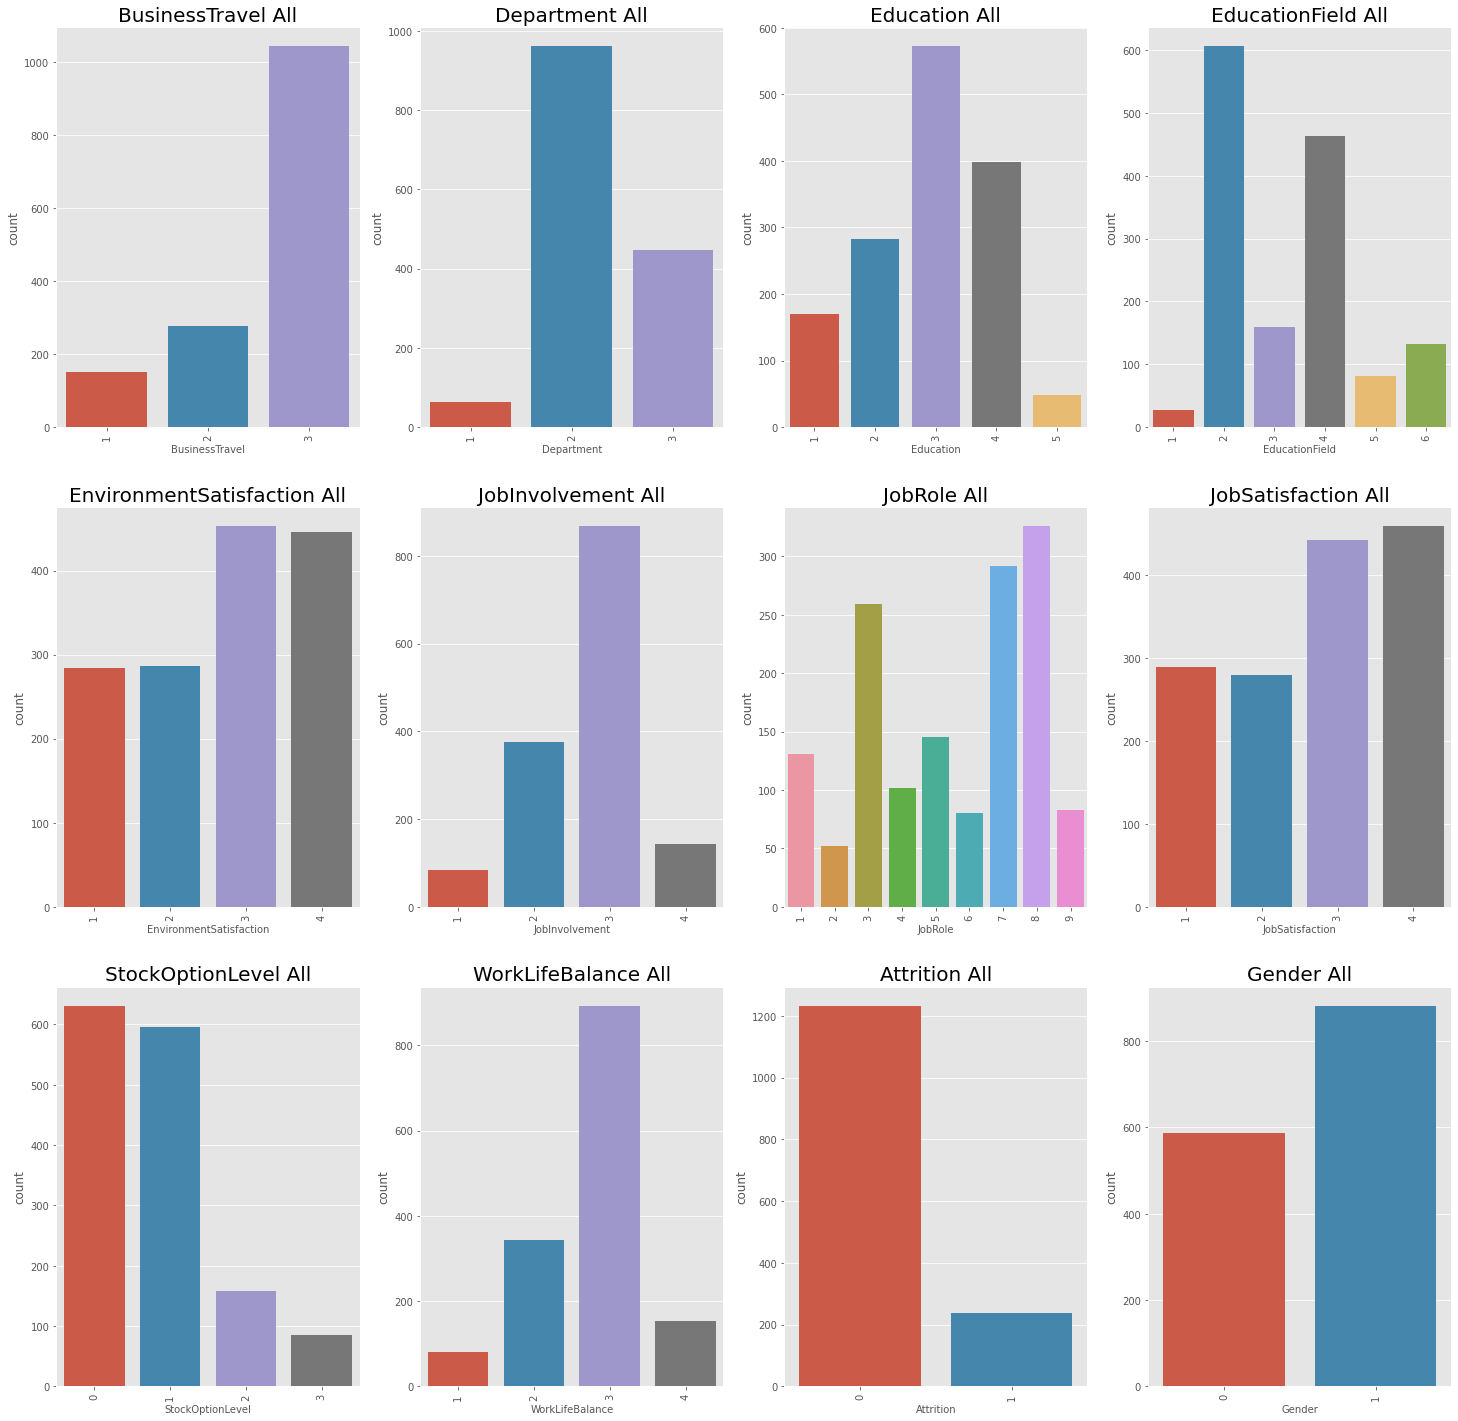

In [106]:
#list of features
cat_features = ["BusinessTravel", "Department", "Education", "EducationField", 
                      "EnvironmentSatisfaction", "JobInvolvement", "JobRole",
                      "JobSatisfaction", "StockOptionLevel", "WorkLifeBalance"
                      , "Attrition", "Gender"]
#call the method
countplot(employee_data_dummies ,cat_features, "All")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


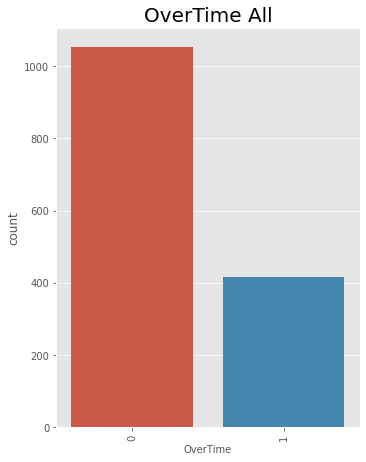

In [108]:
#list of features
cat_features2 = ["OverTime"]
#call the method
countplot(employee_data_dummies, cat_features2, "All")

For continuous data, we use the following codebox to see the distribution:

In [109]:
#Function for plotting continous features
def plot_dist(df, independent_features, type):
  #create figure with wid=25, len=25
  plt.figure(figsize=(25, 20))
  #go throught the list of values
  for loc, feature in enumerate(independent_features):
    #create a subdiagram
    ax = plt.subplot(3, 3, loc+1)
    ax.set_title('{}'.format(feature) + " " + type, fontsize=20)
    sb.distplot(df[feature]) # you can try histplot as well
  return None

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

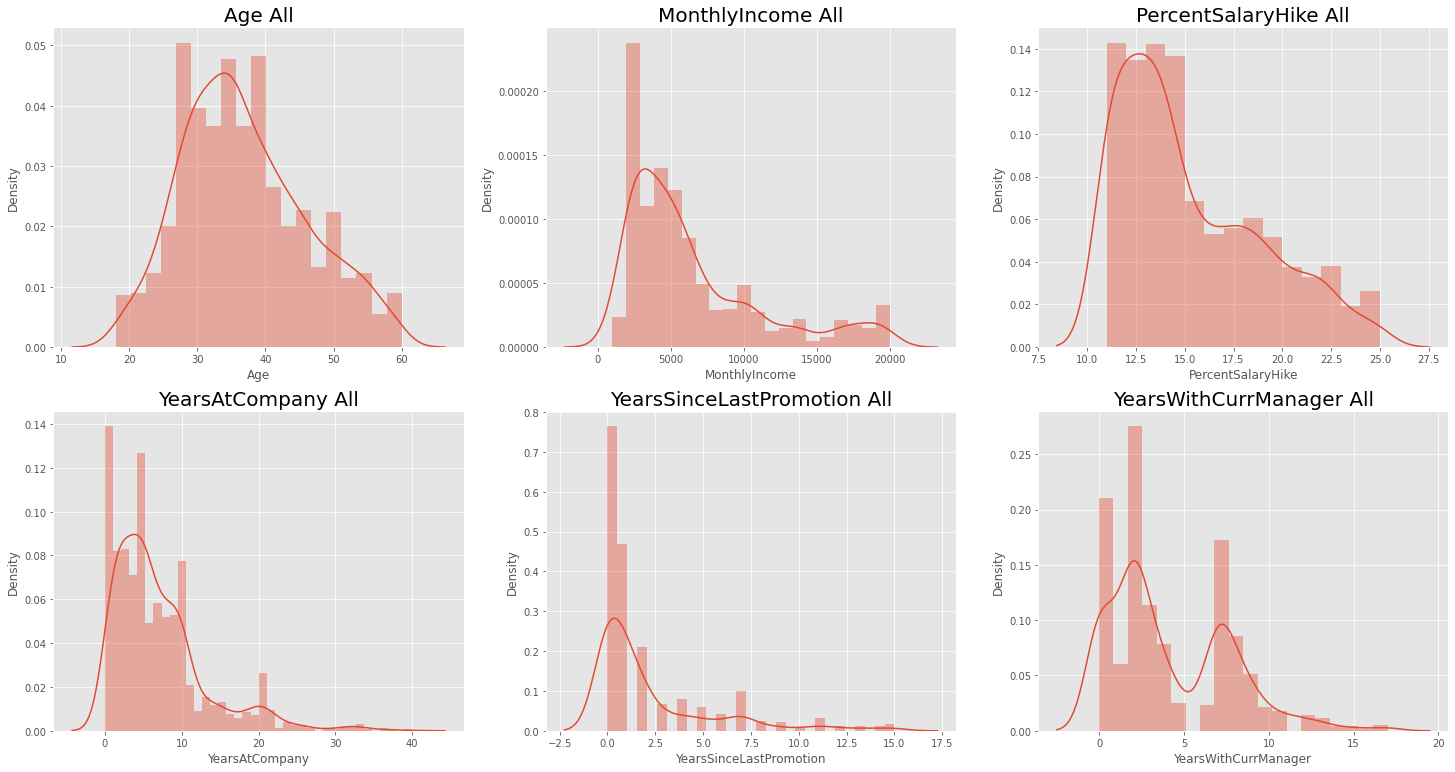

In [110]:
#list of features
continuous_features = ["Age", "MonthlyIncome", "PercentSalaryHike", "YearsAtCompany", 
                       "YearsSinceLastPromotion", "YearsWithCurrManager"]
#call the method
plot_dist(employee_data_dummies, continuous_features, "All")

## Comparing the data of those that are leaving

To fully understand the reasons for attrition, we will have to look at the data of those with a positive value (1) in the "Attrition" feature.

We first separate them from the prior dataframe and save it into a new one:

In [77]:
#Create a new dataframe with only the values of 0 in column "Attrition"
noattrition_data = employee_data_dummies.loc[employee_data_dummies['Attrition'] == 0]

In [78]:
#Create a new dataframe with only the values of 1 in column "Attrition"
attrition_data = employee_data_dummies.loc[employee_data_dummies['Attrition'] == 1]
attrition_data.head()

,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobInvolvement,JobRole,JobSatisfaction,MonthlyIncome,PercentSalaryHike,StockOptionLevel,WorkLifeBalance,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,Gender,OverTime
0,41,3,3,1,2,2,2,3,8,4,5993,11,0,1,6,0,5,1,0,1
2,37,3,2,2,2,5,4,2,3,3,2090,15,0,3,0,0,0,1,1,1
14,28,3,2,24,3,2,3,2,3,3,2028,14,0,3,4,0,3,1,1,1
21,36,3,3,9,4,2,3,2,9,1,3407,23,0,3,5,0,3,1,1,0
24,34,3,2,6,1,4,2,3,7,1,2960,11,0,3,4,1,3,1,1,0


We can now look at the correlation to the other features:

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

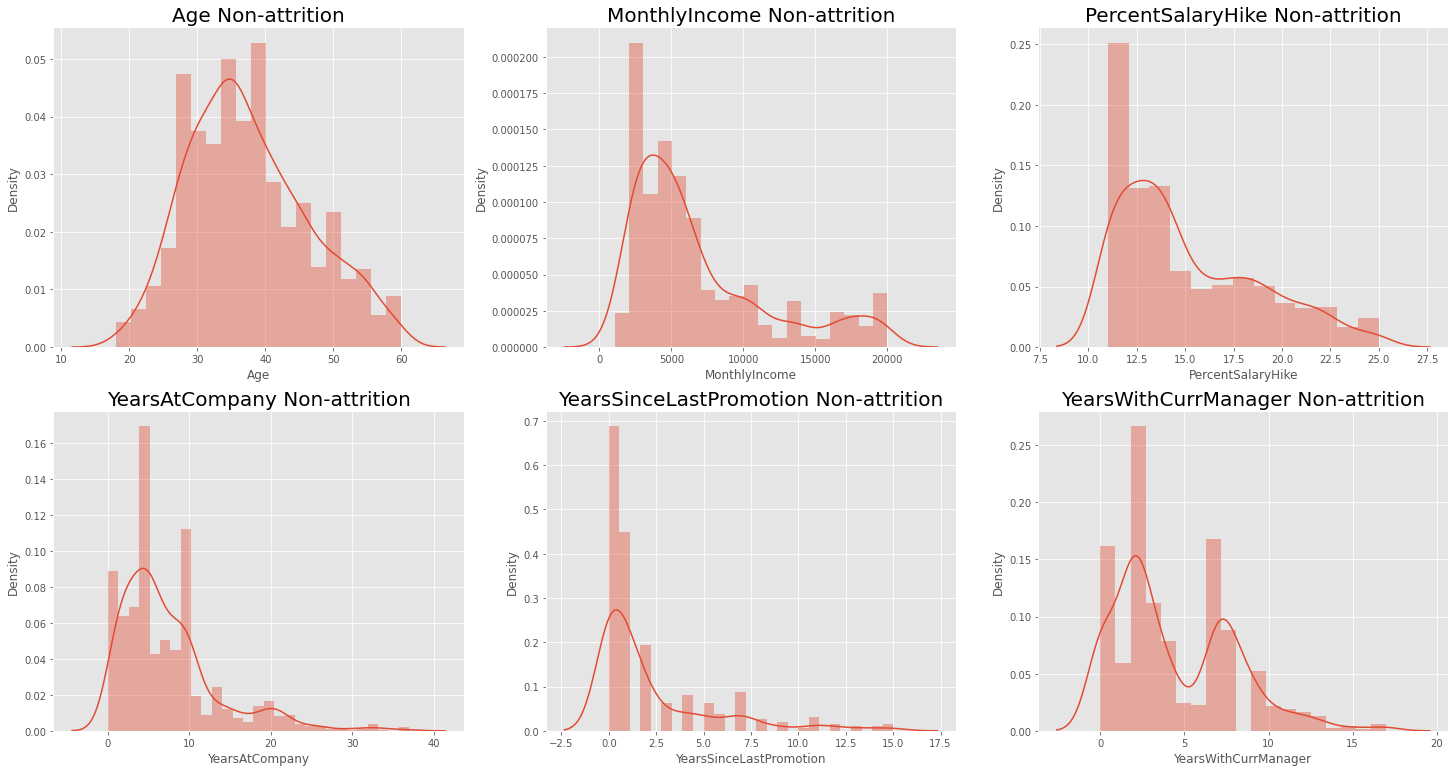

In [111]:
#Use the graphing method to produce visualisations of continous features for nonattrition users
plot_dist(noattrition_data, continuous_features, "Non-attrition")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

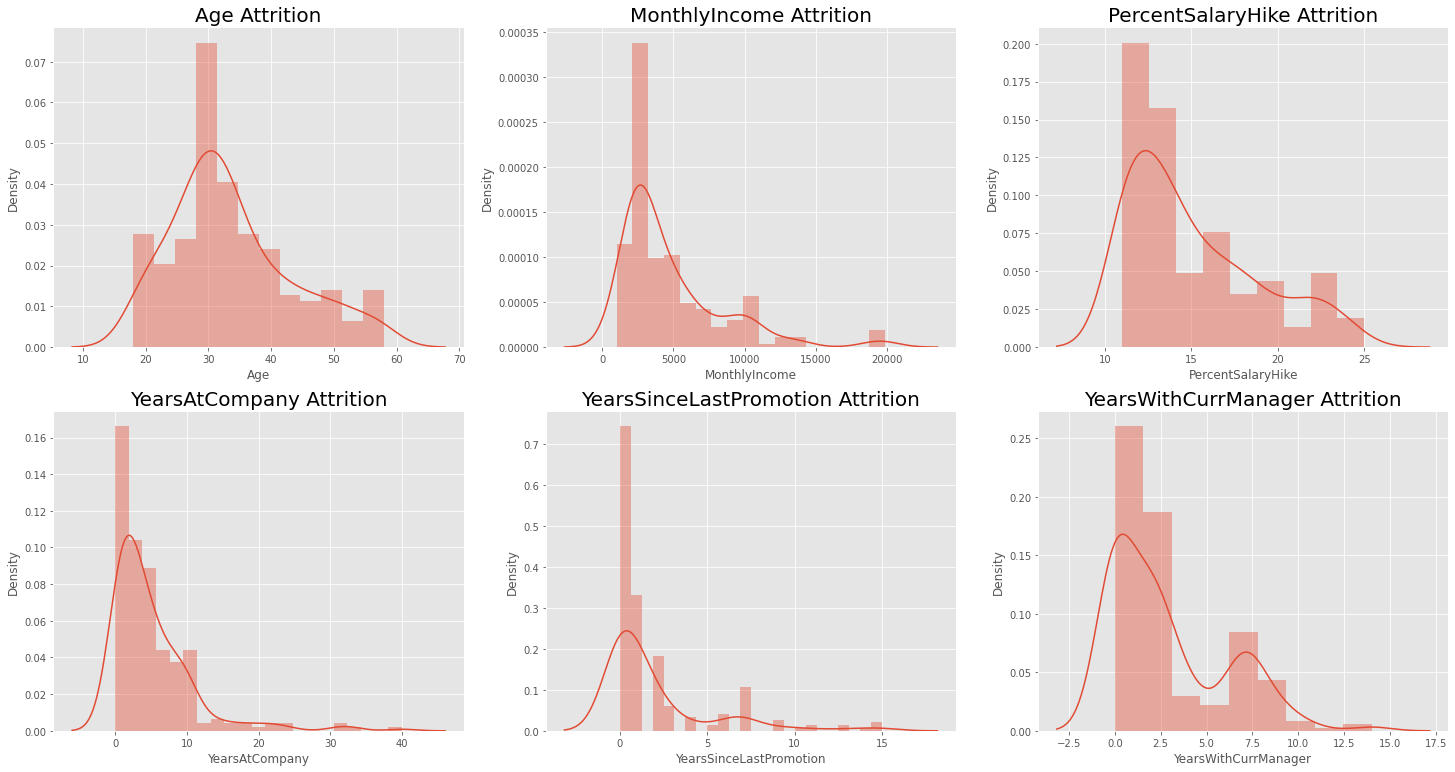

In [112]:
#Use the graphing method to produce visualisations of continous features for attrition users
plot_dist(attrition_data, continuous_features, "Attrition")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

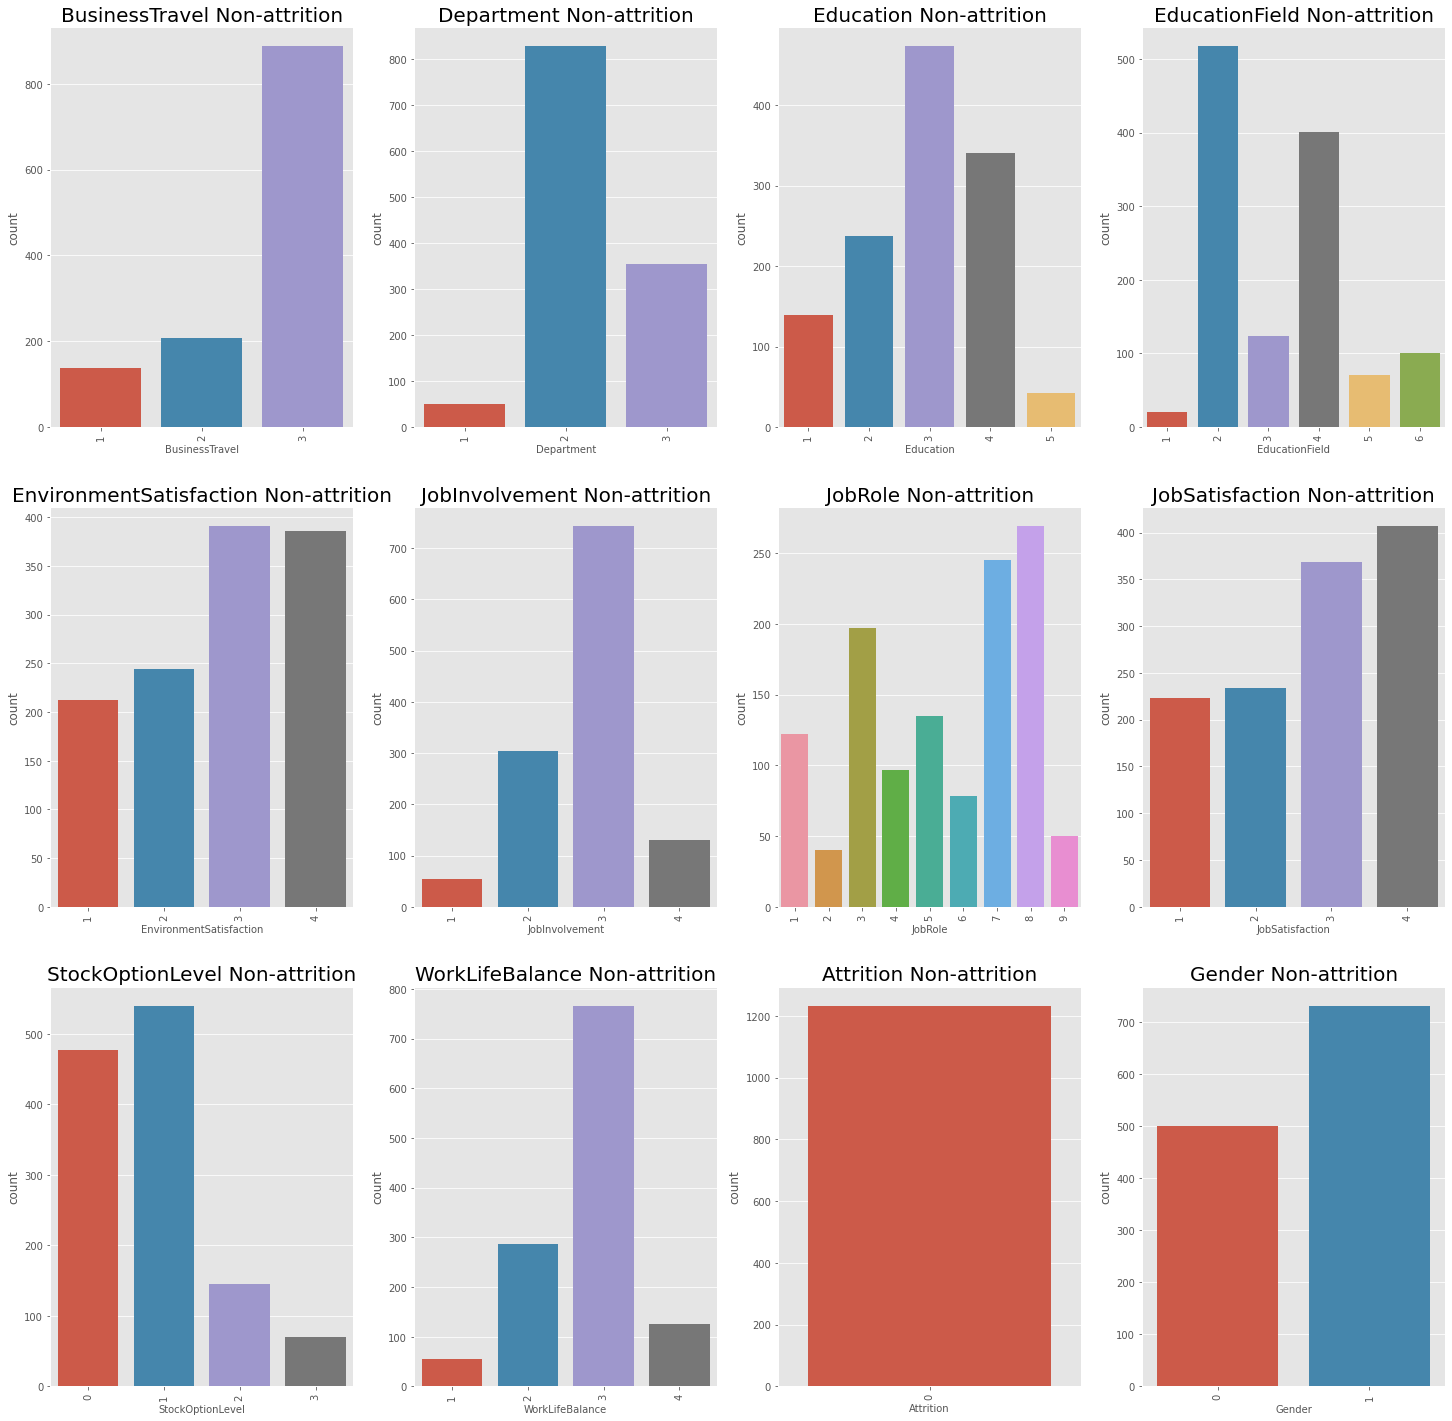

In [113]:
#Use the graphing method to produce visualisations of categorical features for attrition users
countplot(noattrition_data, cat_features, "Non-attrition")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

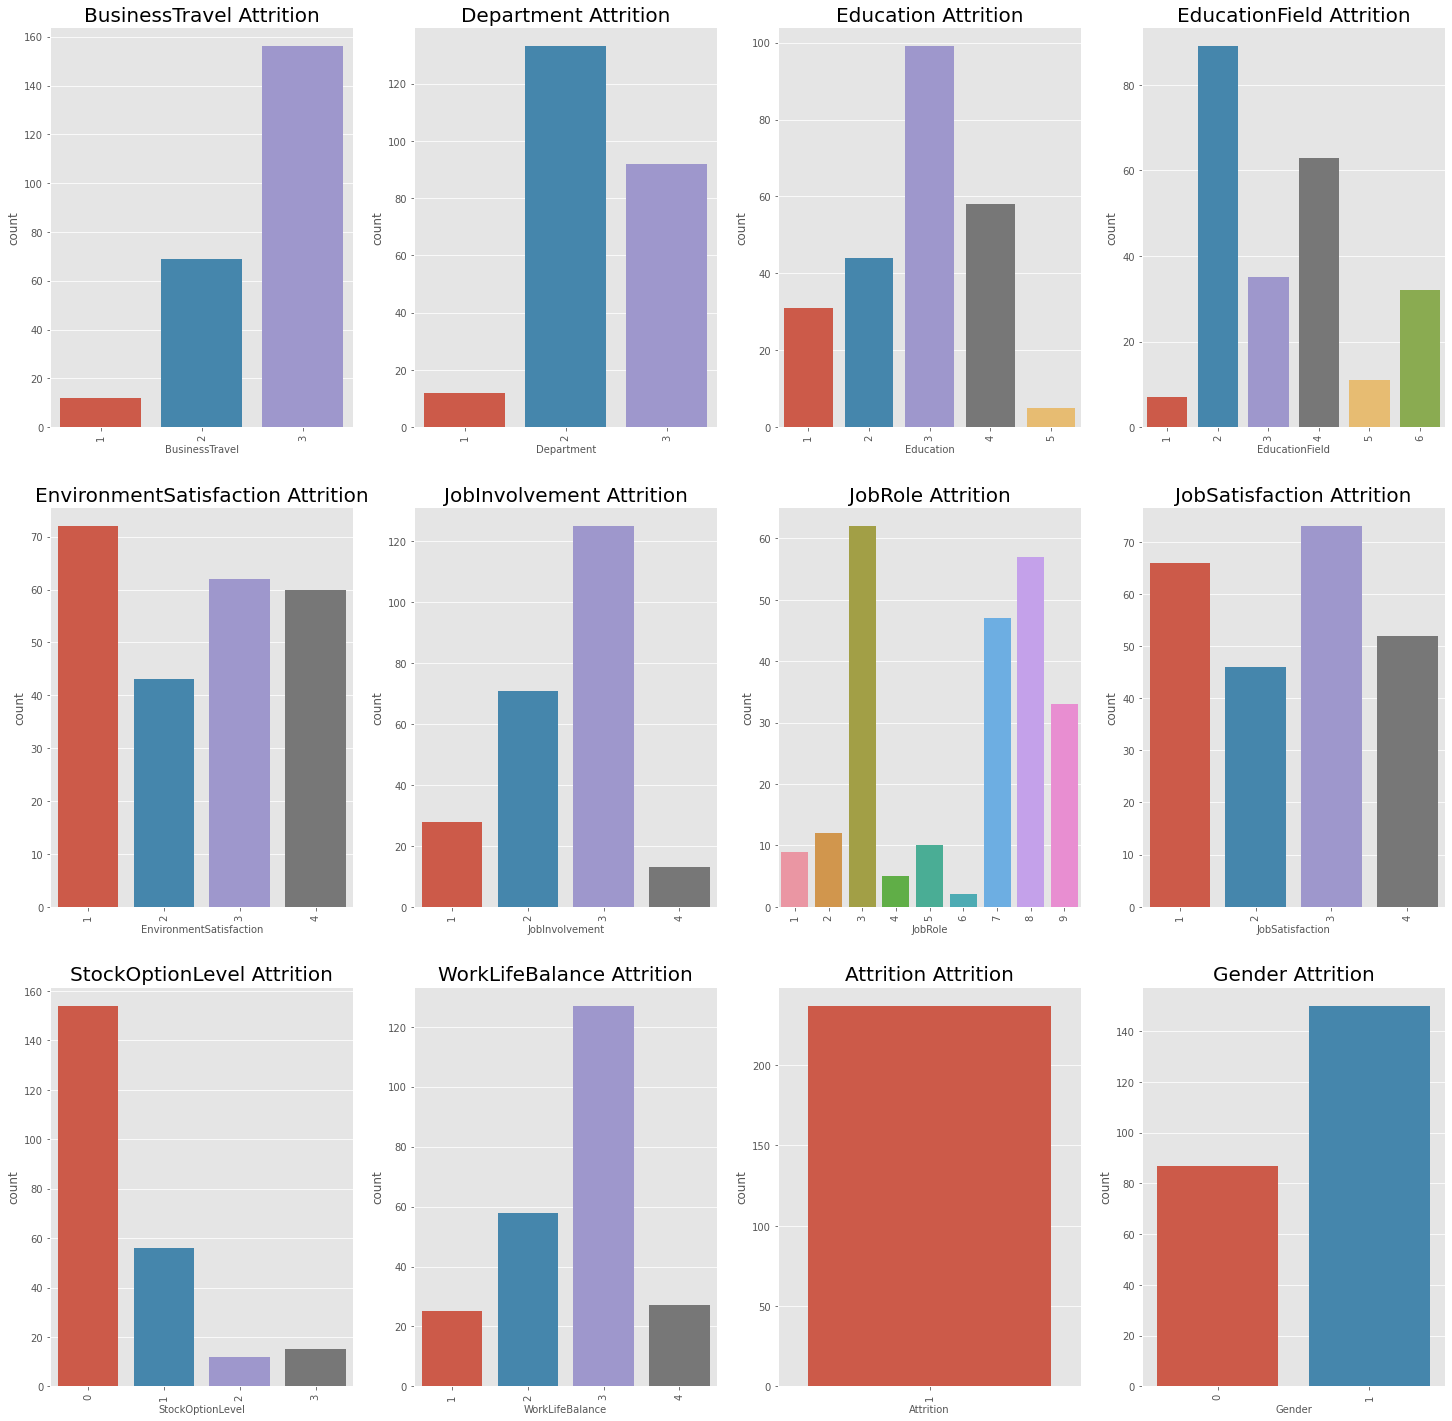

In [114]:
#Use the graphing method to produce visualisations of categorical features for attrition users
countplot(attrition_data, cat_features, "Attrition")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


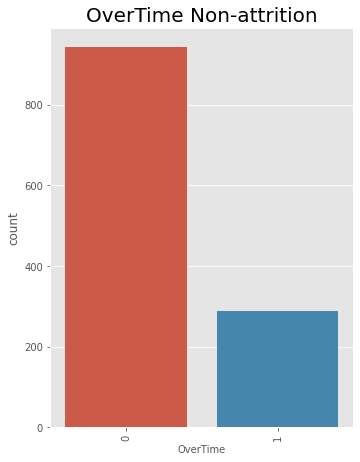

In [115]:
#Use the graphing method to produce visualisations of categorical features for attrition users
countplot(noattrition_data, cat_features2, "Non-attrition")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


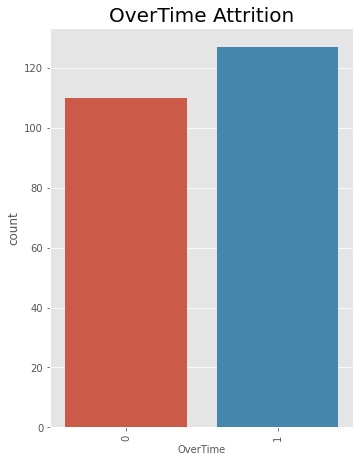

In [116]:
#Use the graphing method to produce visualisations of categorical features for attrition users
countplot(attrition_data, cat_features2, "Attrition")

From these visualisations, we see that there are certain categorical features that change when someone is planning to leave the company. These features of interest that have seen a value increase are:

*   Department: value 3 (Sales).
*   EnvironmentSatisfaction: value 1.
*   JobRole: value 3 (Lab Technician) and 9 (Sales Representative)
*   JobSatisfaction: value 1.
*   StockOptionLevel: value 0.
*   OverTime: values 1

For continuous features, we also see some changes:

*   Age: lower mean.
*   YearsAtCompany: lower mean.
*   YearsWithCurrManager: lower mean.
*   MonthlyIncome: lower mean.






## Checking for outliers and Extreme Values

From here, we will be looking out for any outliers and extreme values. Something to note is that only continous data will have outliers and extreme values so we will just be looking at them.

We start with looking at outliers using the codebox below:


In [85]:
#Method to produce boxplots to show data spread and outliers 
def plot_outlier(feature, name):
  #Create a new figure
  plt.figure(figsize=(25, 6))
  #Use the feature's data so plot in the boxplot
  ax = sb.boxplot(x=feature, linewidth=2.5)
  #set a title
  ax.set_title(name, fontsize=20)

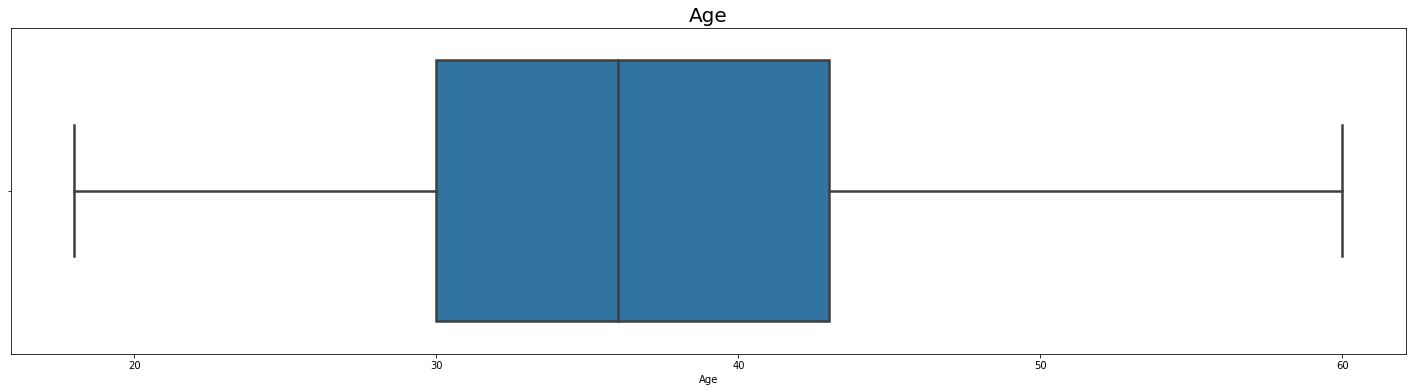

In [86]:
#Call the boxplot method with feature "Age" as the data
plot_outlier(employee_data_dummies["Age"], "Age")

As we can see, there are no outliers or extreme values for "Age".

Moving onto "MonthlyIncome":

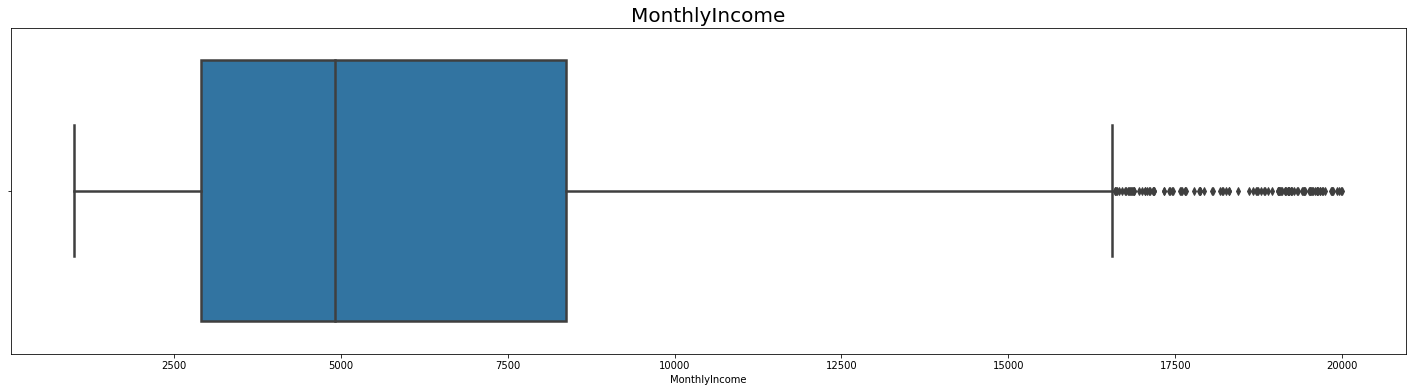

In [87]:
#Call the boxplot method with feature "MonthlyIncome" as the data
plot_outlier(employee_data_dummies["MonthlyIncome"], "MonthlyIncome")

Here we can see outliers but they are not really extreme values as it is still likely that someone would be making 20000 as they could very well be boss.

We can move on to "YearsAtCompany":

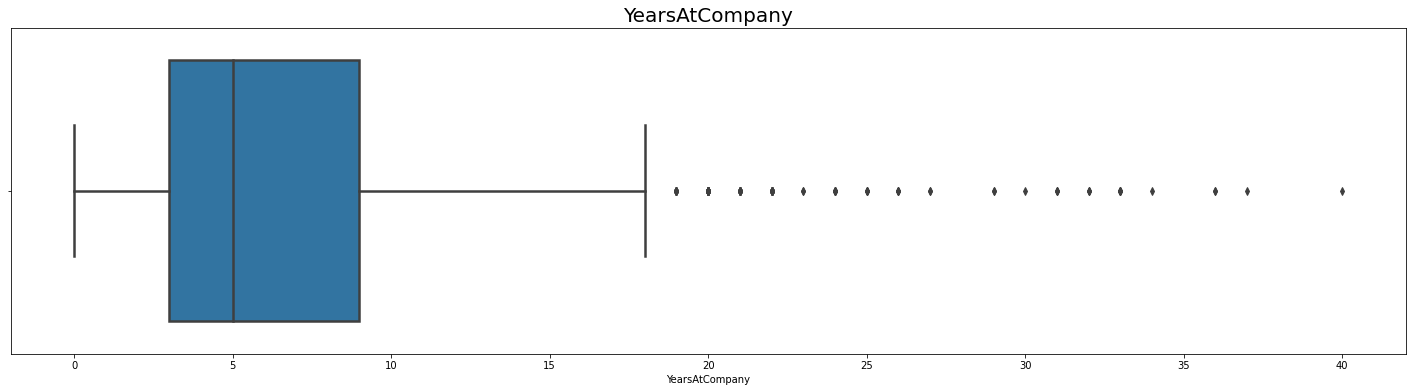

In [88]:
#Call the boxplot method with feature "YearsAtCompany" as the data
plot_outlier(employee_data_dummies["YearsAtCompany"], "YearsAtCompany")

Now this also has outliers but it is not impossible to have someone that has worked at a company for 40 years.

For "YearsWithCurrManager", we have:

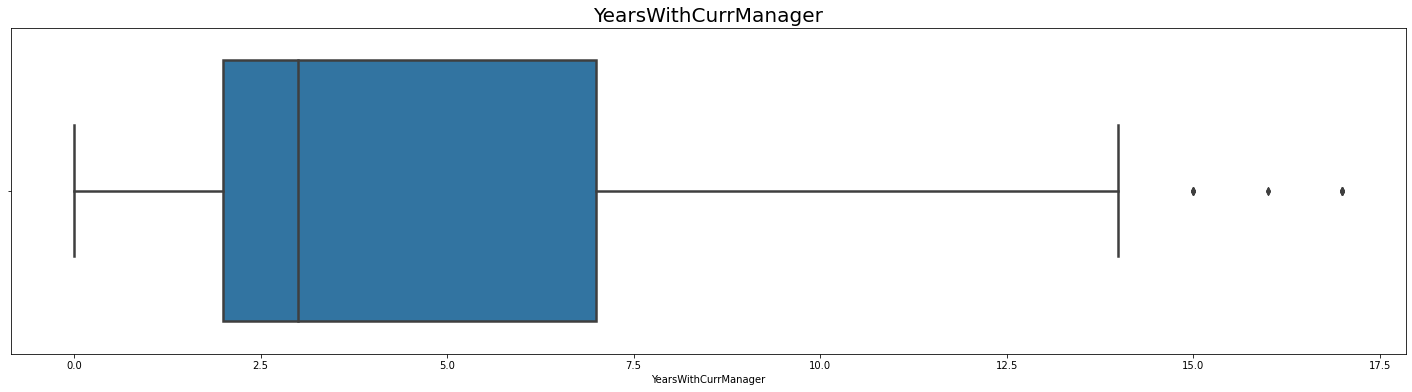

In [89]:
#Call the boxplot method with feature "YearsWithCurrManager" as the data
plot_outlier(employee_data_dummies["YearsWithCurrManager"], "YearsWithCurrManager")

This is also not unusual for someone to work with a particular manager for 17 years.

In all these cases that contain outliers, we will not be removing them as they cannot be seen as extreme values. All the outliers are possible to achieve and therefore are applicable when doing our analysis.

## Checking the correlation and details of the features for Attrition compared to No Attrition

We can now use the data to see any correlation and then see the value difference between attritional and non-attritional employee. 

We will look at the correlation from the attrition dataframe and only looking at the features that were pointed out earlier:

In [90]:
#Show all features
pd.set_option('display.max_columns', None)
#Calculate the correlation of dataframe for attrition users
attrition_data.corr()

,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobInvolvement,JobRole,JobSatisfaction,MonthlyIncome,PercentSalaryHike,StockOptionLevel,WorkLifeBalance,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,Gender,OverTime
Age,1.000000,0.061028,0.078394,0.033881,0.192184,-0.076279,-0.030219,0.070830,-0.004459,0.031509,0.500602,-0.020759,0.150161,-0.075944,0.452909,0.329246,0.336577,NaN,0.081356,-0.000144
BusinessTravel,0.061028,1.000000,-0.007717,-0.099683,0.022224,0.018232,0.063039,-0.025648,-0.048663,0.042547,0.047837,-0.071147,0.042788,-0.042517,0.091649,0.029678,0.051390,NaN,0.027948,-0.002389
Department,0.078394,-0.007717,1.000000,-0.015476,-0.015988,0.018970,0.011854,-0.043346,0.776899,0.056608,0.236441,0.004400,-0.053658,0.039450,0.058021,0.085612,0.077443,NaN,-0.040436,0.001942
DistanceFromHome,0.033881,-0.099683,-0.015476,1.000000,0.044774,-0.086384,0.019447,0.039637,-0.058553,-0.046744,0.038948,0.137674,0.025690,-0.060009,-0.029204,-0.006959,-0.009864,NaN,-0.025880,0.059804
Education,0.192184,0.022224,-0.015988,0.044774,1.000000,-0.077563,-0.037230,0.112600,0.043573,-0.075939,0.105162,0.015257,0.068913,-0.102884,0.157490,0.141172,0.132882,NaN,0.043943,-0.022176
EducationField,-0.076279,0.018232,0.018970,-0.086384,-0.077563,1.000000,0.145841,0.013430,0.045580,0.054038,-0.051069,0.056705,-0.072864,0.056610,0.023712,-0.016590,0.045562,NaN,0.119974,-0.087397
EnvironmentSatisfaction,-0.030219,0.063039,0.011854,0.019447,-0.037230,0.145841,1.000000,0.093255,0.088602,0.046915,-0.089457,0.051231,-0.071978,-0.099402,0.031420,0.104580,0.000282,NaN,0.062840,0.109116
JobInvolvement,0.070830,-0.025648,-0.043346,0.039637,0.112600,0.013430,0.093255,1.000000,-0.024974,-0.047079,-0.008321,-0.014439,0.045594,0.040517,-0.026785,0.032574,0.026431,NaN,-0.009620,0.044822
JobRole,-0.004459,-0.048663,0.776899,-0.058553,0.043573,0.045580,0.088602,-0.024974,1.000000,0.018020,0.025988,0.041293,-0.064121,0.122057,-0.040552,0.048895,0.023118,NaN,-0.048683,0.094978
JobSatisfaction,0.031509,0.042547,0.056608,-0.046744,-0.075939,0.054038,0.046915,-0.047079,0.018020,1.000000,0.004767,-0.147534,0.081676,-0.042071,0.095849,0.091455,0.005296,NaN,0.029398,0.087351


We can see certain correlations between the features of interest:


*   Monthly Income: Age (0.50), YearsAtCompany (0.63), YearsSinceLastPromotion (0.48) and YearsWithCurrManager (0.49).
*   Department: JobRole (0.78)
*   YearsAtCompany: Age (0.45), YearsSinceLastPromotion (0.7) and YearsWithCurrManager (0.77).
*   YearsWithCurrManager: Age (0.34) and YearsSinceLastPromotion (0.68)


Moving onto non-attritional employees, get:



In [91]:
#Calculate the correlation of dataframe for non-attrition users
noattrition_data.corr()

,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobInvolvement,JobRole,JobSatisfaction,MonthlyIncome,PercentSalaryHike,StockOptionLevel,WorkLifeBalance,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,Gender,OverTime
Age,1.000000,0.018747,-0.045143,0.005828,0.208739,-0.028119,-0.001000,-0.005037,-0.137573,-0.033143,0.486713,0.006324,-0.012452,-0.021222,0.264745,0.190892,0.154146,NaN,-0.055353,0.087661
BusinessTravel,0.018747,1.000000,-0.009355,-0.011590,-0.002706,0.024829,-0.006346,0.051577,0.011697,-0.047112,0.033187,-0.022337,-0.026892,-0.005224,-0.031788,-0.042629,-0.033594,NaN,-0.042894,0.020960
Department,-0.045143,-0.009355,1.000000,0.018493,0.015437,0.010425,-0.018581,-0.010088,0.635106,0.021626,0.037483,-0.009488,0.007327,0.028382,0.026524,0.033417,0.039100,NaN,-0.044278,-0.011165
DistanceFromHome,0.005828,-0.011590,0.018493,1.000000,0.019373,0.019026,-0.014166,0.014510,0.004919,0.015008,-0.011321,0.021266,0.062549,-0.012445,0.029983,0.016516,0.033575,NaN,0.000153,-0.006125
Education,0.208739,-0.002706,0.015437,0.019373,1.000000,-0.030834,-0.029207,0.023233,-0.001058,-0.002839,0.089564,-0.016764,0.003809,0.032791,0.048644,0.037161,0.053890,NaN,-0.026652,-0.011013
EducationField,-0.028119,0.024829,0.010425,0.019026,-0.030834,1.000000,0.023368,-0.002109,0.006770,-0.050240,-0.035439,-0.025546,0.000223,0.039629,-0.023220,0.007270,-0.008285,NaN,-0.028730,0.016026
EnvironmentSatisfaction,-0.001000,-0.006346,-0.018581,-0.014166,-0.029207,0.023368,1.000000,-0.048973,-0.032435,-0.031494,-0.012947,-0.051598,0.002085,0.051394,-0.021621,-0.005834,-0.025595,NaN,-0.008612,0.096733
JobInvolvement,-0.005037,0.051577,-0.010088,0.014510,0.023233,-0.002109,-0.048973,1.000000,0.024708,-0.032892,-0.041844,-0.020169,-0.005347,-0.039510,-0.042243,-0.041577,0.001949,NaN,0.028668,0.025826
JobRole,-0.137573,0.011697,0.635106,0.004919,-0.001058,0.006770,-0.032435,0.024708,1.000000,0.026059,-0.102096,-0.008619,0.001084,0.010389,-0.082454,-0.062767,-0.040833,NaN,-0.040461,0.008212
JobSatisfaction,-0.033143,-0.047112,0.021626,0.015008,-0.002839,-0.050240,-0.031494,-0.032892,0.026059,1.000000,-0.028556,0.052447,-0.020536,-0.022626,-0.039733,-0.043382,-0.053233,NaN,0.037886,0.043776


We can see certain correlations between the features of interest:

*    Monthly Income: Age (0.49), YearsAtCompany (0.49), YearsSinceLastPromotion (0.33) and YearsWithCurrManager (0.31).
*    Department: JobRole (0.64)
*    YearsAtCompany: Age (0.26), YearsSinceLastPromotion (0.6) and YearsWithCurrManager (0.76).
*    YearsWithCurrManager: YearsSinceLastPromotion (0.48)

From this we can see that the correlation is generally lower when looking at non-attritional employees. We even see that for "YearsWithCurrManager", "Age" no longer has a weak correlation with it.

We now need to observe the change in values between the attritional data for the continous features of interest that change when the value of "Attrition" is different.

In [92]:
#Create dataframe with only the continous data for attrition users
attrition_data_limited = attrition_data[["Age", "YearsAtCompany",
                                        "YearsWithCurrManager", "MonthlyIncome"]]
#Calculate descriptive statistics for attrition users
attrition_data_limited.describe()

,Age,YearsAtCompany,YearsWithCurrManager,MonthlyIncome
count,237.000000,237.000000,237.000000,237.000000
mean,33.607595,5.130802,2.852321,4787.092827
std,9.689350,5.949984,3.143349,3640.210367
min,18.000000,0.000000,0.000000,1009.000000
25%,28.000000,1.000000,0.000000,2373.000000
50%,32.000000,3.000000,2.000000,3202.000000
75%,39.000000,7.000000,5.000000,5916.000000
max,58.000000,40.000000,14.000000,19859.000000


In [93]:
#Create dataframe with only the continous data for non-attrition users
noattrition_data_limited = noattrition_data[["Age", "YearsAtCompany",
                                        "YearsWithCurrManager", "MonthlyIncome"]]
#Calculate descriptive statistics for non-attrition users
noattrition_data_limited.describe()

,Age,YearsAtCompany,YearsWithCurrManager,MonthlyIncome
count,1233.000000,1233.000000,1233.000000,1233.000000
mean,37.561233,7.369019,4.367397,6832.739659
std,8.888360,6.096298,3.594116,4818.208001
min,18.000000,0.000000,0.000000,1051.000000
25%,31.000000,3.000000,2.000000,3211.000000
50%,36.000000,6.000000,3.000000,5204.000000
75%,43.000000,10.000000,7.000000,8834.000000
max,60.000000,37.000000,17.000000,19999.000000


The results show that employees with a positive attrition are more likely to be younger, have lower wages, and have worked for the company and their current manager for a shorter duration.

## Comparing the algorithms

We are now able to use the information and data that we have cleaned to do our analysis. Before doing this, we can compared the accuracy of different algorithm models that is available from:

https://www.projectpro.io/recipes/compare-sklearn-classification-algorithms-in-python. 

In order to move forward, we had to decide which algorithms are suitable for our analysis and from this we have come to these:

*   Logistic Regression - fits well with this data as it shows the probability of success between 0 and 1.
*   KNeighbors Classifier - Looks at datasets that share the same conditions and uses this to determine which "group" a new value belongs to.
*   Decision Tree Classifier - uses leaves to found the outcome of particular features.
*   Support-Vector Classifier - Mark the data into True and False and using the other features, draw hyperlines that best separate them.
*   Random Forest Classifier - Very similar to a Decision Tree but instead of only having one, multiple are build from different samples and uses the results to define values for classification and regression.

We do this with the codeblocks below:



In [94]:
#Import the different models to compare
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import datasets

plt.style.use('ggplot')

In [95]:
seed = 50
#A list of the features that are correlated to attrition
dataset = {"Department", "EnvironmentSatisfaction", 
            "JobRole", "JobSatisfaction", "StockOptionLevel",
            "OverTime", "Age", "YearsAtCompany",
            "YearsWithCurrManager", "MonthlyIncome"}
#Create new variables for the X (the features that effect Attrition) 
#and Y (the feature we are predicting)
X = employee_data_dummies[dataset]; y = employee_data_dummies["Attrition"]
#Use the X and Y variables  to create test and training data; test size of 30%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
#Shuffle the data to create a more random split
kfold = model_selection.KFold(n_splits=10, random_state=seed, shuffle=True)

In [96]:
#Create a empty list
models = []
#Add the prediction models to be compared to the list
models.append(('LR', LogisticRegression()))
models.append(('KNC', KNeighborsClassifier()))
models.append(('DTC', DecisionTreeClassifier()))
models.append(('SVC', SVC()))
models.append(('RFC', RandomForestClassifier()))

In [97]:
results = []
names = []
scoring = 'accuracy'
for name, model in models:
        #Shuffle the data to create a more random split
         kfold = model_selection.KFold(n_splits=10, random_state=seed, shuffle=True)
         #Evaluate a score by cross-validation for each of the models using the training data.
         cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
         #Store the result of the evaluation in the list "results"
         results.append(cv_results)
         #Store the name of the model
         names.append(name)
         #Create a string message showing the mean score and standard deviation
         msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
         print(msg)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


LR: 0.844489 (0.026541)
KNC: 0.822140 (0.027254)
DTC: 0.785189 (0.050908)
SVC: 0.841576 (0.027585)
RFC: 0.854207 (0.035631)


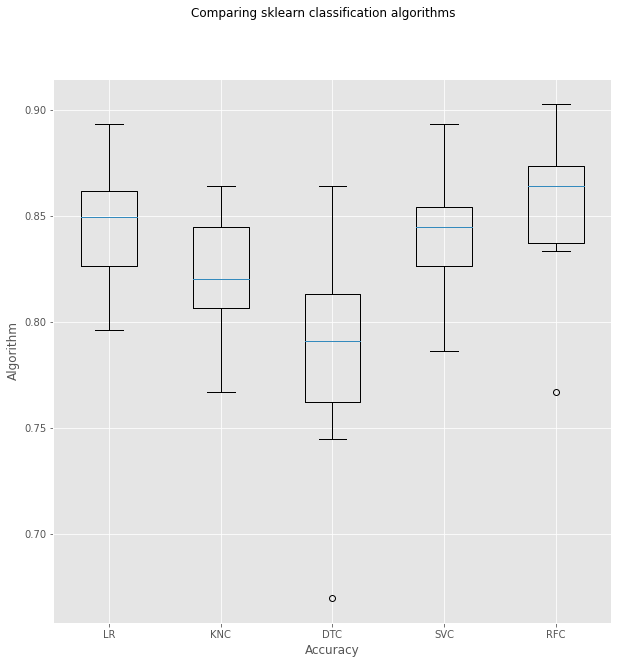

In [98]:
#Create a figure
fig = plt.figure(figsize=(10,10))
#title the figure
fig.suptitle('Comparing sklearn classification algorithms')
ax = fig.add_subplot(111)
#Use the values in the list "results" as the data
plt.boxplot(results)
#Use the values in the list "name" as the x-axis values
ax.set_xticklabels(names)
#Create a y-axis title for the figure
plt.ylabel('Algorithm')
#Create a x-axis title for the figure
plt.xlabel('Accuracy')
#show the figure
plt.show()

From the graph above, we can see that there are three models that perform relatively well with an average of 85% success. These models are Logistic Regression, Support-Vector Classifier and Random Forest Classifier and we therefore believe that these are the best models to use for this analysis.

## Creating the Prediction Models

It is now time to develop our prediction models and see as in the previous chapter we compared the models, we already have the testing and training data ready, we just need to create are models.

In [46]:
#A list of all the features that have a connection till attrition
dataset = {"Department", "EnvironmentSatisfaction", 
            "JobRole", "JobSatisfaction", "StockOptionLevel",
            "OverTime", "Age", "YearsAtCompany",
            "YearsWithCurrManager", "MonthlyIncome"}
#X and y variables that will be used for training and testing the models
XModel = employee_data_dummies[dataset]; yModel = employee_data_dummies["Attrition"]
#Split the data into training and testing with a test size of 20% with a shuffle
#that is allows uniform (random_state)
XModel_train, XModel_test, yModel_train, yModel_test = train_test_split(XModel, 
                                                                        yModel, 
                                                                        test_size=0.2, 
                                                                        random_state=42)

### Logistic Regression

We start by importing the needed model:

In [96]:
#Create a logistic Regression model and save in the variable LogReg
LogReg = LogisticRegression()
#Train the model using the training values 
LogReg.fit(XModel_train, yModel_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [97]:
#Create a variable with the prediction from training data
yModel_pred_train =LogReg.predict(XModel_train)
#Create a variable with the prediction from testing data
yModel_pred_test = LogReg.predict(XModel_test)

In [98]:
#Import confusion matrix
from sklearn.metrics import confusion_matrix
#Use the confusion matrix 
confusion_matrix_LG = confusion_matrix(yModel_test, yModel_pred_test)
confusion_matrix_LG

array([[253,   2],
       [ 37,   2]])

Text(0.5, 257.44, 'Predicted label')

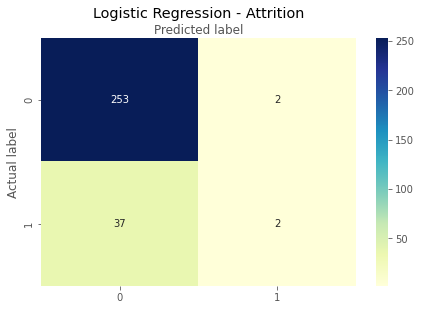

In [99]:
# name  of classes
class_names=[0,1]
#Create multiple plots in the figure
fig, ax = plt.subplots()
#Space out the values equally
tick_marks = np.arange(len(class_names))
#Mark labels for the x-axis
plt.xticks(tick_marks, class_names)
#Mark labels for the y-axis
plt.yticks(tick_marks, class_names)
# create heatmap
sb.heatmap(pd.DataFrame(confusion_matrix_LG), annot=True, cmap="YlGnBu" ,fmt='g')
#Move the labels of the x-axis to the top
ax.xaxis.set_label_position("top")
#Tight padding between subplots
plt.tight_layout()
#Create a title for the figure
plt.title('Logistic Regression - Attrition', y=1.1)
#Create a y-axis title for the figure
plt.ylabel('Actual label')
#Create a x-axis title for the figure
plt.xlabel('Predicted label')

So we see that we have a total of 255 correct results (253 + 2) and 39 wrong predictions (37 + 2). We can work out the accuracy, precision and recall to get:

In [100]:
print("Accuracy:",metrics.accuracy_score(yModel_test, yModel_pred_test))
print("Precision:",metrics.precision_score(yModel_test, yModel_pred_test))
print("Recall:",metrics.recall_score(yModel_test, yModel_pred_test))

Accuracy: 0.8673469387755102
Precision: 0.5
Recall: 0.05128205128205128


This model has a high accuracy of 87%, precision of 50% and a recall 5%.

### Support-Vector Classifier

We do the same as the previous model, we import the support vector model:

In [77]:
#Import the svm model
from sklearn import svm
#Create a svm model and save it in the variable supportVector
supportVector = svm.SVC()
#Train the model using the training sets
supportVector.fit(XModel_train, yModel_train)
#Create a variable that saves the prediction for test dataset
yModel_pred_SVC = supportVector.predict(XModel_test)

In [78]:
#Import confusion matrix
from sklearn.metrics import confusion_matrix
#Use the confusion matrix 
confusion_matrix_SVC = confusion_matrix(yModel_test, yModel_pred_SVC)
confusion_matrix_SVC

array([[255,   0],
       [ 39,   0]])

Text(0.5, 257.44, 'Predicted label')

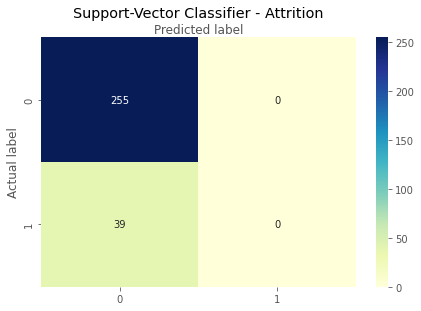

In [79]:
# name  of classes
class_names=[0,1]
#Create multiple plots in the figure
fig, ax = plt.subplots()
#Space out the values equally
tick_marks = np.arange(len(class_names))
#Mark labels for the x-axis
plt.xticks(tick_marks, class_names)
#Mark labels for the y-axis
plt.yticks(tick_marks, class_names)
# create heatmap
sb.heatmap(pd.DataFrame(confusion_matrix_SVC), annot=True, cmap="YlGnBu" ,fmt='g')
#Move the labels of the x-axis to the top
ax.xaxis.set_label_position("top")
#Tight padding between subplots
plt.tight_layout()
#Create a title for the figure
plt.title('Support-Vector Classifier - Attrition', y=1.1)
#Create a y-axis title for the figure
plt.ylabel('Actual label')
#Create a x-axis title for the figure
plt.xlabel('Predicted label')

So we see that we have a total of 255 correct results (255 + 0) and 39 wrong predictions (39 + 0). This means that SVC has performed almost as well as Logistic Regression, but a major issue is that it cannot identify positive values; neither for when it is True-positive nor False-Positive. This would make the model obsolete.

In [95]:
print("Accuracy:",metrics.accuracy_score(yModel_test, yModel_pred_SVC))
print("Precision:",metrics.precision_score(yModel_test, yModel_pred_SVC))
print("Recall:",metrics.recall_score(yModel_test, yModel_pred_SVC))

Accuracy: 0.8673469387755102
Precision: 0.0
Recall: 0.0


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Not being able to identify positive values means that both the precision and recall are 0% as it cannot replicate the results. Accuracy is high with 87% but it does make is worthless with non-existent precision and recall.

### Random Forest Classifier

In [107]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier
#Create a Random Forest model and save it in the variable randomForest
randomForest=RandomForestClassifier(n_estimators=100)
#Train the model using the training sets
randomForest.fit(XModel_train,yModel_train)
#Create a variable that saves the prediction for test dataset
yModel_pred_RF = randomForest.predict(XModel_test)

In [108]:
yModel_pred_RF

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0], dtype=uint8)

In [109]:
#Import confusion matrix
from sklearn.metrics import confusion_matrix
#Use the confusion matrix 
confusion_matrix_RF = confusion_matrix(yModel_test, yModel_pred_RF)
confusion_matrix_RF

array([[246,   9],
       [ 34,   5]])

Text(0.5, 257.44, 'Predicted label')

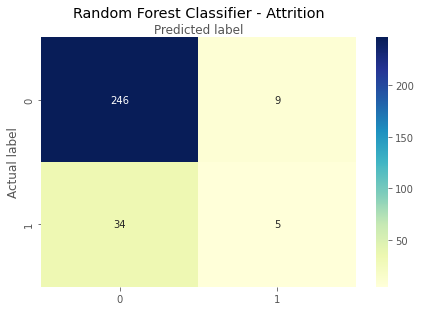

In [110]:
# name  of classes
class_names=[0,1]
#Create multiple plots in the figure
fig, ax = plt.subplots()
#Space out the values equally
tick_marks = np.arange(len(class_names))
#Mark labels for the x-axis
plt.xticks(tick_marks, class_names)
#Mark labels for the y-axis
plt.yticks(tick_marks, class_names)
# create heatmap
sb.heatmap(pd.DataFrame(confusion_matrix_RF), annot=True, cmap="YlGnBu" ,fmt='g')
#Move the labels of the x-axis to the top
ax.xaxis.set_label_position("top")
#Tight padding between subplots
plt.tight_layout()
#Create a title for the figure
plt.title('Random Forest Classifier - Attrition', y=1.1)
#Create a y-axis title for the figure
plt.ylabel('Actual label')
#Create a x-axis title for the figure
plt.xlabel('Predicted label')

So we see that we have a total of 251 correct results (246 + 5) and 43 wrong predictions (34 + 9). Something that is important to note is that everytime the code is run (from the being of the subsection), new result is given.

In [111]:
print("Accuracy:",metrics.accuracy_score(yModel_test, yModel_pred_RF))
print("Precision:",metrics.precision_score(yModel_test, yModel_pred_RF))
print("Recall:",metrics.recall_score(yModel_test, yModel_pred_RF))

Accuracy: 0.8537414965986394
Precision: 0.35714285714285715
Recall: 0.1282051282051282


We see that Random Forest Classifier has a 2% points lower accuracy and almost 15% points lower precision compared to Logistic Regression. However, we get a bump in recall with 8% points increase in recall. As noted earlier, these values are not stable and will change everytime the code is run again.

## The Conclusion

Here we will be going over our chooses and how they have affected the results. We shall also discuss how the algorithms performed compared to each other.

**The Dataset**

The dataset in and of itself was already very broad with many features having little to no correlation with each other (EnvironmentSatisfaction and MonthlyIncome) but also had data that was far to connect such as YearAtCompany and YearsWithCurrManager. It also had feature that only had one unique value (StandardHours and Over18) would have not provided any benefit to an analysis. It also contains a substantial amount of personal information (RelationshipSatisfaction and DistanceFromWork) which has might have no bearing to work.

**The Analysis**

Before we started the prediction analysis, we had to clean the dataset so that analysis only used feature that had an effect on the chance of attrition. We first removed the feature that were brought up in "The Dataset" section above. We saw them as either not being relevant (Over18, RelationshipSatisfaction, etc.) and/or they were to connected with other features (MonthlyRate, DailyRate, TotalWorkingYears, etc). To determine the correlation with Attrition, we used the .corr() function, however this wasn't insightful so we decided to look at the change in count for each feature using a bar chart for each of them. This allowed us  to find several feature of interest that had a change when comparing attritional to non-attritional employees. When choosing the algorithms, we used the scikit-learn algorithm cheat-sheet and we saw that our prediction needed to be a categorical datatype and from this we were lead to classification algorithms. Accuracy was choosen as the method of comparision for the algorithm, but instead of going directly to prediction, we used the scikit-learn comparison algorithm  that looked at the algorithms that were given and plotted their accuracy on a graph so that we were able to identify the best models. From this, we come to the 3 models that are Logistic Regression, Support-Vector Classifier and Random Forest Classifier.

After the analysis of the models, we looked at each of their accuracy, precision and recall, and from this, we determined that the best model is the Random Forest Classifier as it has the highest recall. The reason for having a high recall is that we want to see how many positives for attrition there will be from looking at the specific features and thus by showing the actual positives that are caught, the prediction is better able to find employees at risk of attrition.